In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from scipy import stats
from tqdm import tqdm
import random

In [2]:
inputFile = "MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv"
data = pd.read_csv(inputFile,sep='\t',low_memory=False)

In [3]:
data_processed = data[['Peptide'] + [c for c in data.columns if 'intensity_for_peptide_variant' in c]]

In [4]:
data_processed.replace(0.0,np.nan, inplace = True)

/tmp/ipykernel_85/24937952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_processed.replace(0.0,np.nan, inplace = True)


In [5]:
data_processed = data_processed.set_index("Peptide")

In [6]:
data_processed = data_processed.T

In [7]:
data_processed

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-21.617)V(K,304.207).A","K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A"
_dyn_#Empty.Empty.Empty..Empty.1_intensity_for_peptide_variant,2.459416,0.961707,0.326271,0.878024,0.170619,0.570221,0.574879,0.914939,0.649916,0.017884,...,0.521673,0.240862,0.787867,1.144694,0.929711,1.007395,0.353838,0.302468,0.735814,1.068300
_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for_peptide_variant,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,NaN,1.958825,NaN,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN
_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_for_peptide_variant,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,NaN,2.544654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_for_peptide_variant,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,NaN,0.913199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_for_peptide_variant,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,NaN,1.035449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ6.Symptomatic-non-COVID-19..JBDZ6.1_intensity_for_peptide_variant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.622780,0.613630,0.020799,...,NaN,0.189781,NaN,NaN,NaN,NaN,NaN,0.143696,NaN,0.118712
_dyn_#Symptomatic-non-COVID-19.JBDZ7.Symptomatic-non-COVID-19..JBDZ7.1_intensity_for_peptide_variant,NaN,0.435434,0.200232,NaN,NaN,NaN,NaN,NaN,NaN,0.061746,...,NaN,0.247039,0.298399,NaN,NaN,0.670534,0.304344,NaN,NaN,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ8.Symptomatic-non-COVID-19..JBDZ8.1_intensity_for_peptide_variant,NaN,0.736280,0.170478,NaN,NaN,NaN,NaN,NaN,NaN,0.074855,...,NaN,0.246862,0.192796,NaN,NaN,1.330314,0.532133,NaN,NaN,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ9.Symptomatic-non-COVID-19..JBDZ9.1_intensity_for_peptide_variant,NaN,0.796550,0.197400,NaN,NaN,NaN,NaN,NaN,NaN,0.053722,...,NaN,0.296288,0.335600,NaN,NaN,1.204776,0.549213,NaN,NaN,NaN


In [8]:
data_processed.index = data_processed.index.map(lambda x:'.'.join(x.split('.')[:2]))

In [9]:
def create_label(x):
    if "#Healthy" in x:
        return 1
    elif "#Non-severe-COVID-19" in x:
        return 2
    elif "#Severe-COVID-19" in x:
        return 3
    elif "#Symptomatic-non-COVID-19" in x:
        return 4
    else:
        return 0
data_processed["label"]=data_processed.index.map(lambda x: create_label(x))

In [10]:
data_processed = data_processed[data_processed['label']!=0]

In [11]:
## Split Train and Test data after shuffling 
#data_processed.dropna(axis=1,inplace=True)
data_processed = data_processed.sample(frac=1, random_state=42)

data_processed.dropna(axis=1,inplace=True)

train = data_processed.iloc[:66,:]
test = data_processed.iloc[66:,:]

In [12]:
data_processed

Peptide,"R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S","R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S","K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L","R.[304.207]DDTV(C,58.003)LA(K,304.207).L","K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,304.207).L","D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-18.085)FRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-19.069)FRDDTV(C,57.021)LA(K,304.207).L","K.[304.207]DLLFRDDTV(C,57.021)LA(K,304.207).L","R.[304.207]DDTV(C,73.017)LA(K,304.207).L",...,L.[304.207]FIYYASSLQSGVPSR.F,"K.[304.207]YLGEEYV(K,304.207).A","K.[304.207](Y,347.65)LGEEYV(K,304.207).A","K.[304.207]YLGEEY(V,128.488)(K,304.207).A","K.{52.915}[304.207]YLGEEYV(K,304.207).A","K.[304.207]YLGEE(Y,21.985)V(K,304.207).A","K.[304.207]YL(G,13.987)EEYV(K,304.207).A","K.[304.207]YLGEEY(V,-18.002)(K,304.207).A","K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A",label
_dyn_#Non-severe-COVID-19.XG3,0.085017,0.852811,0.206083,0.114862,0.551174,0.392397,1.829180,0.667676,0.383060,0.868445,...,0.079721,0.699133,0.132804,0.231346,0.393102,0.599851,0.160796,0.277927,0.388465,2
_dyn_#Non-severe-COVID-19.Patient-group-PT,0.223794,0.468280,1.292670,0.846633,1.785873,0.395804,0.694310,0.610408,1.753949,1.335815,...,1.974454,1.943645,0.117838,0.839239,2.081710,1.513647,0.511558,0.933900,1.182999,2
_dyn_#Severe-COVID-19.XG36,0.061436,0.093823,0.053313,0.348643,0.075135,0.182105,0.055951,0.159644,0.011824,0.387000,...,0.053557,0.084413,0.033842,0.114396,0.215791,0.280818,0.105432,0.076816,0.065322,3
_dyn_#Symptomatic-non-COVID-19.JBDZ14,0.094259,0.185329,0.956349,0.302998,1.159294,0.591963,0.038915,0.263765,1.296192,0.737937,...,0.747284,0.948188,0.966776,0.391096,0.996684,0.799369,0.177114,0.478877,0.474480,4
_dyn_#Healthy.HC1,0.101284,1.352256,0.272530,0.161400,0.829766,0.694992,3.535461,0.724774,0.578344,0.808526,...,0.076964,1.036398,0.141851,0.340883,0.558244,0.923967,0.205740,0.402553,0.575944,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Healthy.HC9,0.094497,0.254848,0.200908,0.111151,0.137870,0.158178,0.239026,0.228600,0.063915,0.041477,...,0.029928,0.373451,0.084071,0.059444,0.303213,0.390227,0.108136,0.134491,0.118989,1
_dyn_#Severe-COVID-19.XG42,0.044843,0.191617,0.917630,0.309265,0.353423,0.174655,0.127000,0.701526,0.548986,0.686248,...,0.220155,0.506223,0.067858,0.279197,0.497181,0.767148,0.438247,0.541052,0.723857,3
_dyn_#Symptomatic-non-COVID-19.JBDZ15,0.077130,0.237354,0.979818,0.168809,1.104969,0.561231,0.052402,0.227559,1.276553,0.377695,...,1.301254,0.761360,0.568085,0.318025,0.769956,0.604217,0.184606,0.370367,0.425314,4
_dyn_#Healthy.HC28,0.076341,0.301121,1.417788,0.365292,0.498423,0.261009,0.213849,0.932500,0.864131,0.807664,...,0.243651,0.739273,0.085299,0.418623,0.888054,1.199273,0.594104,0.804388,1.209548,1


In [13]:
# #Filter Data based on NaN for each label in training data
# per_label_count = train.groupby('label').count()
# filterCondition = (per_label_count >= 10).all()
# filter_per_label = per_label_count.loc[:, filterCondition]
# filter_column = list(filter_per_label.columns) +['label']
# filter_data =  train[filter_column]

In [14]:
# for column in tqdm(filter_data):
#     if column != "label":
#         filter_data[column] = filter_data.groupby("label")[column].transform(lambda x: x.fillna(x.mean()))

In [15]:
##filter_data.to_csv("filterd_data.tsv", sep="\t")
train.shape

(66, 10635)

In [16]:
#filter_data = train
# corr = train.corr()

In [17]:
#Correlation Matrix
# columns = np.full((corr.shape[0],), True, dtype=bool)
# for i in range(corr.shape[0]):
#     for j in range(i+1, corr.shape[0]):
#         if corr.iloc[i,j] >= 0.9:
#             if columns[j]:
#                 columns[j] = False
# selected_columns = train.columns[columns]
# train = train[selected_columns]

In [18]:
# print(len(selected_columns))
# print(train.shape)

In [19]:
##Ttest 
from itertools import combinations
from scipy import stats
from collections import defaultdict

grouped_df = train.groupby('label')
label_key = list(grouped_df.groups.keys())
peptide_key = list(grouped_df.get_group(label_key[0]).keys())


def ttest_run(c1, c2):
    results = stats.ttest_ind(c1, c2, equal_var=False, alternative='two-sided')
    if results.pvalue < 0.05:
        return 1
    return 0
    

imp = []
for p in tqdm(peptide_key):
    group_peptide = defaultdict(dict)
    for k in label_key: 
        group_peptide[k] = grouped_df.get_group(k)[p]
    
    ttest = [ttest_run(list(group_peptide[i]),list(group_peptide[j])) for i, j in combinations(label_key, 2)]
    if sum(ttest) > 0:
        imp.append(p)

    

100%|██████████| 10635/10635 [00:43<00:00, 242.79it/s]


In [20]:
len(imp)

1595

In [21]:
train = train[imp]

In [22]:
corr = train.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = train.columns[columns]
train = train[selected_columns]

print(len(selected_columns))
print(train.shape)

945
(66, 945)


In [23]:
test1 = test[train.columns]
# test1 = test1.fillna(0.0)

<AxesSubplot:xlabel='Peptide', ylabel='Peptide'>

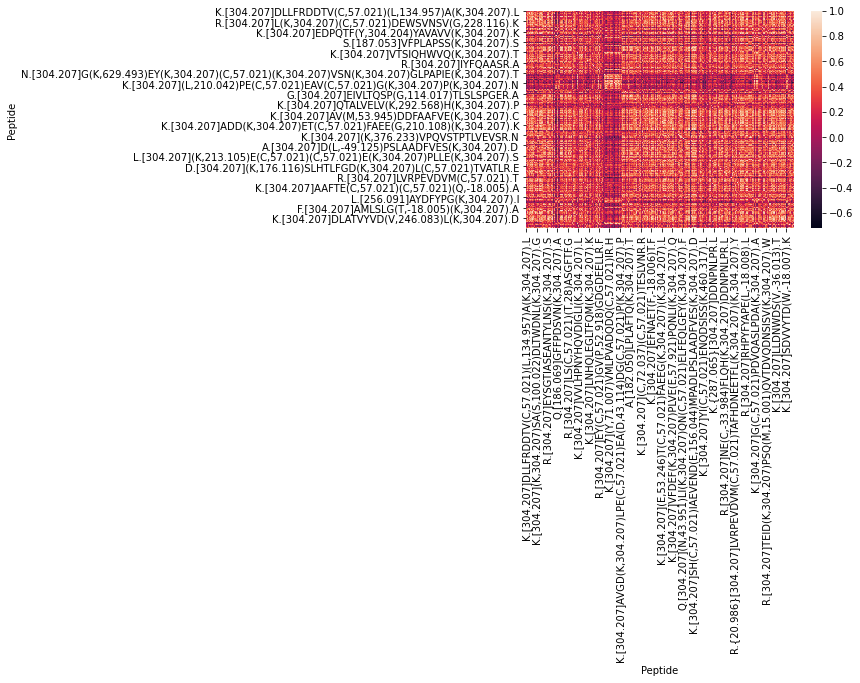

In [24]:
sns.heatmap(corr)

In [25]:
test1.shape

(24, 945)

In [26]:
## Logistic Regression 

X_train, Y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_test, Y_test = test1.iloc[:,:-1], test1.iloc[:,-1]

In [27]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# selector = SelectKBest(chi2, k = 800)

# selector.fit(X_train, Y_train)

# selected_cols = selector.get_support(indices = True)

# X_train = X_train.iloc[:, selected_cols]

In [28]:
# X_train

In [29]:
# X_test = X_test[X_train.columns]


In [30]:
# X_test

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
from sklearn.metrics import  classification_report

# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [32]:
# lr = LogisticRegression(random_state = 10)
# lr.fit(X_train,Y_train)

In [33]:
# lr_Y = lr.predict(X_test)
# lr_acc = accuracy_score(Y_test, lr_Y)
# print(lr_acc)
# print(classification_report(Y_test, lr_Y))

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
svm_classifier = SVC(kernel="linear")


# classifier.fit(X_train, Y_train)
# y_pred = classifier.predict(X_test)
# rf_acc = accuracy_score(Y_test, y_pred)
# rf_acc

In [35]:
# Y_test 

In [36]:
# import matplotlib.pyplot as plt

# y = train[['-.[304.207](L,43.006)(K,304.207)(C,57.021)DEWSVNSVG(K,304.207).I', 'label']]
# val = y.groupby('label').mean()
# plt.scatter(list(val.index),list(val.values))
# plt.plot()

In [37]:
# val.values

In [38]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [39]:
lr1 = LogisticRegression(random_state = 20)

In [40]:
min_features_to_select = 500  # Minimum number of features to consider
rfecv_lr = RFECV(
    estimator=lr1,
    step=5,
    cv=5,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)


In [41]:
rfecv_lr.fit(X_train, Y_train)
rfecv_lr_Y = rfecv_lr.predict(X_test)
rfecv_lr_acc = accuracy_score(Y_test, rfecv_lr_Y)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [42]:
rfecv_lr_acc

0.875

In [43]:
print(classification_report(Y_test, rfecv_lr_Y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.80      1.00      0.89         4
           3       1.00      0.62      0.77         8
           4       0.78      1.00      0.88         7

    accuracy                           0.88        24
   macro avg       0.89      0.91      0.88        24
weighted avg       0.90      0.88      0.87        24



In [44]:
print(rfecv_lr.n_features_)

500


In [45]:
arr = [i for i in rfecv_lr.ranking_ if i==1]
len(arr)

500

In [46]:
# print('Best features :', X_train.columns[rfecv_lr.support_])

X_new = X_train[X_train.columns[rfecv_lr.ranking_ == 1]]


In [47]:
X_new

Peptide,"D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L","V.[304.207](N,-37.08)DNEEGFFS.A","K.{95.076}[304.207]NLNE(K,304.207)DYEL.L","R.[304.207](K,304.207)(P,37.954)VEEYAN(C,57.021)HLAR.A","P.[304.207](D,9.387)PWA(K,304.207)NLNE(K,304.207)DYELL(C,57.021)LDGTR.K","K.[304.207](D,239.131)YELL(C,57.021)LDGTR.K","R.{52.928}[304.207]FDEFFSEG(C,57.021)APGS(K,304.207)(K,304.207).D","R.{17.032}[304.207]FDEFFSEG(C,57.021)APGS(K,304.207)(K,304.207).D","K.{17.026}[304.207]L(C,57.021)MGSGLNL(C,57.021)EPNN(K,304.207).E","R.[304.207]FDEFF(S,52.918)EG(C,57.021)APGS(K,304.207).K",...,"K.[304.207]HPL(K,304.207)PDNQPFPQSVSES(C,57.021)PG(K,304.207).F","K.[304.207]Y(K,304.207)EENDDFASFR.V","K.[304.207]Y(K,304.207)EENDDFASFRVD(R,-65.982).I","K.[304.207]ALDLIN(K,304.207)R.R","A.[304.207]VSPT(D,304.21)(C,57.021)SAVEPEAE(K,304.207).A","R.[304.207]DVVQIT(C,57.021)LDGFEVVEGR.V","R.[304.207]IINEPTAAAIAYGLD(K,304.207)R.E","R.[304.207]FFESFGDL(S,304.224)TPDAVMGNP(K,304.207).V","R.[304.207](K,304.207)VTEEN(K,304.207)ELANELR.R",R.[304.207]TLLEGEESR.M
_dyn_#Non-severe-COVID-19.XG3,0.392397,0.747673,0.800306,0.468161,1.148519,0.362406,1.373303,0.778044,1.183115,0.528576,...,0.080011,0.825921,0.765267,0.242801,0.194234,0.580950,0.519771,0.172002,0.591369,0.657138
_dyn_#Non-severe-COVID-19.Patient-group-PT,0.395804,1.006224,0.977877,0.513356,2.735986,0.356569,1.096824,0.382021,1.222776,2.212671,...,1.160423,1.860011,0.915517,0.359545,1.366417,0.562038,1.278701,1.895313,0.478140,0.344999
_dyn_#Severe-COVID-19.XG36,0.182105,0.225180,0.419376,0.392325,0.341035,0.183894,0.184651,0.022005,0.474879,0.371174,...,0.013467,0.192164,0.144987,0.027940,0.041596,0.103430,0.044911,0.069193,0.039067,0.763682
_dyn_#Symptomatic-non-COVID-19.JBDZ14,0.591963,0.755652,0.500030,1.184445,0.876999,0.945804,1.623152,0.613807,1.220555,1.104198,...,0.280219,0.700115,0.644608,0.172114,0.523520,0.856469,0.649433,1.230099,0.117840,0.174758
_dyn_#Healthy.HC1,0.694992,1.073651,0.951255,0.382047,1.559895,0.269722,1.856462,0.989390,1.495875,0.692956,...,0.033012,0.954001,0.707768,0.142079,0.154712,0.360746,0.678679,0.533766,1.394006,0.941775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Severe-COVID-19.XG43,0.096511,0.721068,0.743046,0.540366,0.874239,0.211187,0.974787,0.555260,0.366686,0.146474,...,0.098626,0.017562,0.205952,0.201035,0.389368,0.203706,0.222718,0.214876,0.218724,4.255680
_dyn_#Symptomatic-non-COVID-19.JBDZ9,0.187691,0.455921,0.333517,0.653602,0.440727,0.221496,2.362541,1.333647,0.549838,0.344027,...,0.148881,0.276934,0.622109,0.172799,0.137691,0.361478,0.124220,0.127671,0.094223,2.606456
_dyn_#Healthy.HC3,0.230169,0.658724,0.975745,0.535163,1.234538,0.342927,1.604237,0.888618,1.274046,0.630600,...,0.062526,0.805736,0.849801,0.140247,0.185113,0.626886,0.553673,0.674883,1.719363,0.686474
_dyn_#Symptomatic-non-COVID-19.JBDZ16,0.469259,0.670716,0.767161,0.461949,1.134474,0.960598,1.527627,1.153451,0.727611,0.847992,...,0.974426,0.160275,0.754666,0.303441,0.257359,0.203191,3.093932,0.516706,0.087123,9.632314


In [56]:
def z_score(df):
    df_std = df.copy()
    for col in df_std.columns:
        df_std[col] = (df_std[col] - df_std[col].mean()) / df_std[col].std()
        df_std[col] = df_std[col].map(lambda x: x if np.isnan(x) else min(3, max(-3, x)))
    
    return df_std

In [58]:
peptides_heatmap = data_processed.copy()
top_peptides = ["D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L", "V.[304.207](N,-37.08)DNEEGFFS.A", "K.{95.076}[304.207]NLNE(K,304.207)DYEL.L", "R.[304.207](K,304.207)(P,37.954)VEEYAN(C,57.021)HLAR.A", "P.[304.207](D,9.387)PWA(K,304.207)NLNE(K,304.207)DYELL(C,57.021)LDGTR.K", "K.[304.207](D,239.131)YELL(C,57.021)LDGTR.K", "R.{52.928}[304.207]FDEFFSEG(C,57.021)APGS(K,304.207)(K,304.207).D", "R.{17.032}[304.207]FDEFFSEG(C,57.021)APGS(K,304.207)(K,304.207).D", "K.{17.026}[304.207]L(C,57.021)MGSGLNL(C,57.021)EPNN(K,304.207).E", "R.[304.207]FDEFF(S,52.918)EG(C,57.021)APGS(K,304.207).K"]
peptides_heatmap = peptides_heatmap.loc[:, list(top_peptides)]
peptides_heatmap = z_score(peptides_heatmap)
peptides_heatmap = peptides_heatmap.T
peptides_heatmap

,_dyn_#Non-severe-COVID-19.XG3,_dyn_#Non-severe-COVID-19.Patient-group-PT,_dyn_#Severe-COVID-19.XG36,_dyn_#Symptomatic-non-COVID-19.JBDZ14,_dyn_#Healthy.HC1,_dyn_#Non-severe-COVID-19.XG13,_dyn_#Non-severe-COVID-19.XG25,_dyn_#Symptomatic-non-COVID-19.JBDZ1,_dyn_#Healthy.HC24,_dyn_#Non-severe-COVID-19.XG7,...,_dyn_#Healthy.HC12,_dyn_#Non-severe-COVID-19.XG1,_dyn_#Symptomatic-non-COVID-19.JBDZ4,_dyn_#Symptomatic-non-COVID-19.JBDZ18,_dyn_#Symptomatic-non-COVID-19.JBDZ3,_dyn_#Healthy.HC9,_dyn_#Severe-COVID-19.XG42,_dyn_#Symptomatic-non-COVID-19.JBDZ15,_dyn_#Healthy.HC28,_dyn_#Severe-COVID-19.XG31
Peptide,,,,,,,,,,,,,,,,,,,,,
"D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L",0.180796,0.192555,-0.544995,0.869568,1.225155,0.060025,-0.688579,0.556846,0.051000,-0.793657,...,0.305885,-0.664171,-0.475902,-0.355321,-0.479694,-0.627576,-0.570709,0.763499,-0.272670,-0.644011
"V.[304.207](N,-37.08)DNEEGFFS.A",0.887459,1.924938,-1.209140,0.919473,2.195502,-0.689672,-0.865615,-0.655729,-0.661344,-0.619708,...,-0.703321,0.313351,-1.455984,0.336388,1.184660,-0.207001,-0.230969,0.225530,1.564616,-0.694366
"K.{95.076}[304.207]NLNE(K,304.207)DYEL.L",0.299780,0.801880,-0.777338,-0.549279,0.726602,-0.096749,-0.296758,0.850507,0.286929,-1.367804,...,0.503382,-0.208325,-0.181945,0.718629,-0.719333,-1.053611,0.010540,-0.950423,0.651947,1.304490
"R.[304.207](K,304.207)(P,37.954)VEEYAN(C,57.021)HLAR.A",-0.384245,-0.273096,-0.570753,1.377348,-0.596030,-0.499823,-1.123387,-0.501687,2.911899,-0.109302,...,-0.401425,-0.562753,-0.912363,1.285929,-0.885197,-0.104085,0.379140,-0.351942,1.184795,-0.452510
"P.[304.207](D,9.387)PWA(K,304.207)NLNE(K,304.207)DYELL(C,57.021)LDGTR.K",0.765140,3.000000,-0.616297,0.300626,1.468919,-0.393072,-0.771399,1.965337,-0.187898,-0.807894,...,-0.815865,-0.552297,-0.164771,0.031522,-0.254439,-0.324295,-0.208120,0.705327,0.217508,-0.496222
"K.[304.207](D,239.131)YELL(C,57.021)LDGTR.K",-0.387265,-0.404444,-0.912663,1.329800,-0.660055,-0.669679,-0.545404,-0.158137,0.306040,-0.883000,...,-0.563471,-0.516431,0.172493,1.678633,-0.606718,-0.770785,1.651133,1.073042,1.955242,-0.035441
"R.{52.928}[304.207]FDEFFSEG(C,57.021)APGS(K,304.207)(K,304.207).D",-0.147533,-0.418780,-1.313688,0.097587,0.326481,-0.344012,-0.662674,0.855670,0.998128,-1.129441,...,-0.172175,-1.122817,-1.245584,0.443333,-0.106766,-0.514224,-0.289534,1.630223,0.841892,-0.993671
"R.{17.032}[304.207]FDEFFSEG(C,57.021)APGS(K,304.207)(K,304.207).D",-0.064847,-0.561975,-1.013904,-0.271013,0.200456,-0.879418,0.143208,0.540689,2.209907,-0.800243,...,-0.855863,-0.855051,-0.987445,0.726003,-0.238736,-0.369590,0.094162,0.578385,1.183468,-0.974512
"K.{17.026}[304.207]L(C,57.021)MGSGLNL(C,57.021)EPNN(K,304.207).E",0.784692,0.879181,-0.902610,0.873888,1.529810,-0.181242,-0.081350,1.325447,0.207958,-0.953447,...,0.553007,0.466599,-0.077229,0.359684,-0.287315,-0.813725,-0.355296,0.367848,0.002517,1.874021


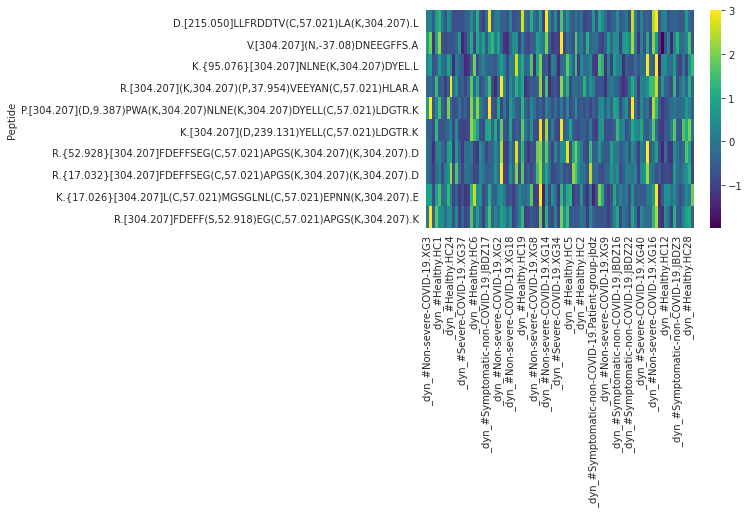

In [60]:
cmap = sns.color_palette('viridis', as_cmap = True)

with sns.axes_style('white'):
    sns.heatmap(peptides_heatmap, cmap = cmap)

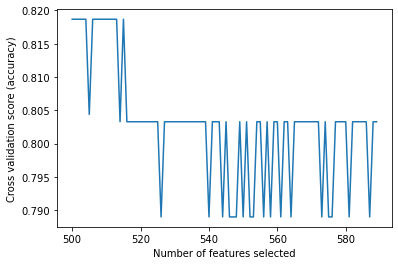

In [78]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv_lr.grid_scores_) + min_features_to_select),
    rfecv_lr.grid_scores_,
)
plt.show()

In [46]:
rfecv_rfc = RFECV(
    estimator=rf_classifier,
    step=5,
    cv=5,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)

rfecv_rfc.fit(X_train, Y_train)
rfecv_rfc_Y = rfecv_rfc.predict(X_test)
rfecv_rfc_acc = accuracy_score(Y_test, rfecv_rfc_Y)


In [47]:
rfecv_rfc_acc

0.4166666666666667

In [48]:
print(classification_report(Y_test, rfecv_rfc_Y))

              precision    recall  f1-score   support

           1       0.38      0.60      0.46         5
           2       0.36      1.00      0.53         4
           3       1.00      0.25      0.40         8
           4       0.33      0.14      0.20         7

    accuracy                           0.42        24
   macro avg       0.52      0.50      0.40        24
weighted avg       0.57      0.42      0.38        24



In [49]:
print(rfecv_rfc.n_features_)

934


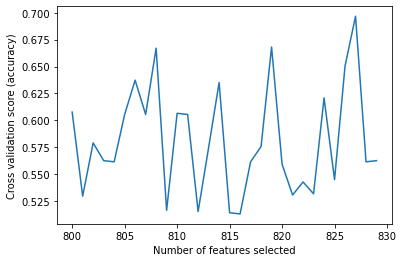

In [50]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv_rfc.grid_scores_) + min_features_to_select),
    rfecv_rfc.grid_scores_,
)
plt.show()

In [51]:
rfecv_svc = RFECV(
    estimator=svm_classifier,
    step=5,
    cv=5,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)

rfecv_svc.fit(X_train, Y_train)
rfecv_svc_Y = rfecv_svc.predict(X_test)
rfecv_svc_acc = accuracy_score(Y_test, rfecv_svc_Y)

In [52]:
rfecv_svc_acc

0.8333333333333334

In [53]:
print(classification_report(Y_test, rfecv_svc_Y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.50      0.75      0.60         4
           3       1.00      0.62      0.77         8
           4       0.88      1.00      0.93         7

    accuracy                           0.83        24
   macro avg       0.84      0.84      0.83        24
weighted avg       0.88      0.83      0.84        24



In [54]:
print(rfecv_svc.n_features_)

800


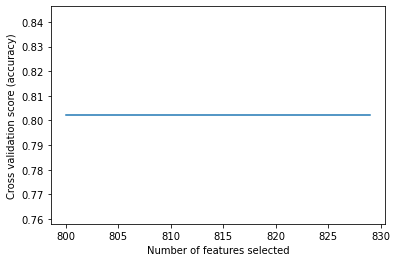

In [55]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv_svc.grid_scores_) + min_features_to_select),
    rfecv_svc.grid_scores_,
)
plt.show()